In [4]:
import torch
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from utilities import *
from VoxelGrid import *
device='cuda'


In [6]:
focal, all_c2w, all_gt = get_data("../nerf_synthetic/hotdog")

LOAD DATA ../nerf_synthetic/hotdog/train


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 47.95it/s]


In [7]:
H, W = all_gt[0].shape[:2]

In [8]:
rays_or_dir = [get_rays_np(H,W, focal, c2w) for c2w in all_c2w]

In [9]:
camera_centers = get_cameras_centers(rays_or_dir)

In [10]:
bound_w = 1.5
size = 20
VG = VoxelGrid(size, bound_w)
x = np.linspace(-bound_w,bound_w,size)
y = np.linspace(-bound_w,bound_w,size)
z = np.linspace(-bound_w,bound_w,size)
xx,yy,zz = np.meshgrid(x,y,z)

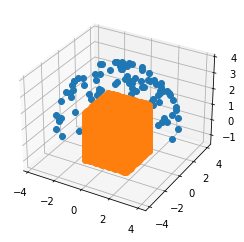

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot( camera_centers[:,0], camera_centers[:,1], camera_centers[:,2], 'o')
ax.plot( xx.flatten(),yy.flatten(),zz.flatten(), 'o')


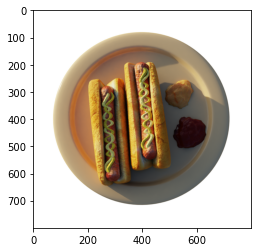

In [12]:
plt.imshow(all_gt[0])

In [19]:
rays_or_dir = get_rays_np(H,W, focal, all_c2w[0])

In [20]:
rays_or_dir[1][0,0]

array([1.06319213, 0.31035228, 0.17848331])

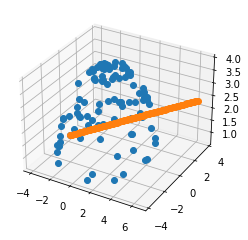

In [21]:
p = rays_or_dir[0][0,0]+ np.arange(100)[:, None]/10*rays_or_dir[1][0,0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot( camera_centers[:,0], camera_centers[:,1], camera_centers[:,2], 'o')
ax.plot( p[:,0], p[:,1], p[:,2], 'o')